<a href="https://colab.research.google.com/github/OleksiiLatypov/Bot_Assistant/blob/master/template_transformers_pipelines_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hugging Face Transformers Library**
[Hugging Face](https://huggingface.co) is a large open-source community. Their [Hub](https://huggingface.co/models) has a very large number of pre-trained deep learning models, mainly aimed at NLP, using Transformers. In this lab, you will learn how to use pre-trained Hugging Face models to solve various NLP, CV, and Audio tasks.

**Instructions**
- Write code in the space indicated with `### START CODE HERE ###`
- Do not use loops (for/while) unless instructions explicitly tell you so. Parallelization in Deep Learning is key!
- If you get stuck, ask for help in Slack or DM `@DRU Team`

**You will learn**
- How to use `pipeline()` from the [Models Hub](https://huggingface.co/models) for inference on a variety of NLP, CV, and Audio tasks
- How to use [Gradio](https://gradio.app/docs/) library for easy creating user interface and handling the pipeline inference directly on Google Colab notebook

# **Import packages**

In [ ]:
import numpy as np
import pandas as pd
import torch
from torch import nn

!pip install transformers==4.17.0
import transformers
from transformers import pipeline
from transformers import Conversation

!pip install sentence_transformers
import sentence_transformers
from sentence_transformers import SentenceTransformer, util

!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html

!pip install gradio
import gradio as gr

!pip install sentencepiece

!pip install timm
import matplotlib.pyplot as plt
from PIL import Image

Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html


In [ ]:
# VALIDATION_FIELD[func] set_seed

def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)

set_seed(42)

**List of tasks that we will cover:**

- **NLP**:
    - Masked language modeling
    - Question Answering
    - Table Question Answering
    - Summarization
    - Sentence Similarity
    - Text Classification
    - Token Classification
    - Zero-Shot Classification
    - Translation
    - Text generation
    - Text2Text Generation
    - Conversational
- **Audio**:
    - Text-to-Speech
    - Automatic Speech Recognition

- **Computer Vision**:
    - Image Classification
    - Image Segmentation

The easiest way to use a pre-trained Transformer model on a given task is to use a `pipeline()`.

[Pipeline](https://huggingface.co/docs/transformers/pipeline_tutorial) helps to perform all pre-processing and post-processing steps on your input data:
1. **Tokenization:** Split the initial input into multiple sub-entities with properties (tokens).
2. **Inference:** Maps every token into a more meaningful representation.
3. **Decoding:** Use the above representation to generate and/or extract the final output for the given task.

# **NLP Tasks**

## **Masked language modeling**

[Masked language modeling](https://huggingface.co/tasks/fill-mask) (MLM) is the task of masking tokens (e.g., replaced by `[MASK]`) in a sequence and predicting which words should replace this masked word with an appropriate token.

### Inference with Fill-Mask Pipeline

You can use the Transformers library `fill-mask` pipeline to infer with masked language models, which you can find on the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=fill-mask&sort=downloads). There are many pretrained models here that can be used to solve the MLM task.

**Excercise:**
>For the proposed `masked_sequences`, we suggest finding you among the models on the [hub](https://huggingface.co/models?pipeline_tag=fill-mask&sort=downloads) a pretrained base BERT (uncased) model, which is already pretrained on a large corpus of English data, and use it in the pipeline for inference. Your model should return `top_k=2` predictions for each sentence in `unmasked_sequences`. All the parameters that the `fill-mask` pipeline uses are described [here](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.FillMaskPipeline).



In [ ]:
# VALIDATION_FIELD[func] model_mlm

set_seed(42)

masked_sequences = ["I love animals very much, that's why I work as a [MASK].",
        "I live several years in Russia, but now I live in [MASK].",
        "I love to play [MASK], so my bought me a ball."
        ]

### START CODE HERE ### (≈ 2-4 lines of code)
model_mlm = pipeline("fill-mask", model="bert-base-uncased")    # specify: task and model
unmasked_sequences =  model_mlm(masked_sequences, top_k=2)      # use the pipeline with parameter top_k=2
### END CODE HERE ###

for text_i in range(len(masked_sequences)):
    print(f"\nMasked sentence {text_i + 1}: {masked_sequences[text_i]}\nSuggested unmasked sentences:")
    for output_i in unmasked_sequences[text_i]:
        print(f"\t{output_i['sequence']} \t | Masked word: {output_i['token_str']}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]


Masked sentence 1: I love animals very much, that's why I work as a [MASK].
Suggested unmasked sentences:
	i love animals very much, that's why i work as a vet. 	 | Masked word: vet
	i love animals very much, that's why i work as a farmer. 	 | Masked word: farmer

Masked sentence 2: I live several years in Russia, but now I live in [MASK].
Suggested unmasked sentences:
	i live several years in russia, but now i live in france. 	 | Masked word: france
	i live several years in russia, but now i live in ukraine. 	 | Masked word: ukraine

Masked sentence 3: I love to play [MASK], so my bought me a ball.
Suggested unmasked sentences:
	i love to play football, so my bought me a ball. 	 | Masked word: football
	i love to play baseball, so my bought me a ball. 	 | Masked word: baseball


**Expected output:**
```
Masked sentence 1: I love animals very much, that's why I work as a [MASK].
Suggested unmasked sentences:
	i love animals very much, that's why i work as a vet. 	 | Masked word: vet
	i love animals very much, that's why i work as a farmer.   | Masked word: farmer

Masked sentence 2: I live several years in Russia, but now I live in [MASK].
Suggested unmasked sentences:
	i live several years in russia, but now i live in france. 	 | Masked word: france
	i live several years in russia, but now i live in ukraine. 	| Masked word: ukraine

Masked sentence 3: I love to play [MASK], so my bought me a ball.
Suggested unmasked sentences:
	i love to play football, so my bought me a ball. 	 | Masked word: football
	i love to play baseball, so my bought me a ball. 	 | Masked word: baseball
```

## **Question Answering**
[Question Answering](https://huggingface.co/tasks/question-answering) (QA) is a type of language task that produces answers based on a given document/text or generates answers without context.

### Inference with Question Answering Pipeline
You can find on the Hugging Face Hub a pretrained model among a wide variety of models for [QA tasks](https://huggingface.co/models?pipeline_tag=question-answering&sort=downloads). [Here](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.QuestionAnsweringPipeline) is a description of the parameters for the `question-answering` pipeline.

**Excercise:**
>Find on the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=question-answering&sort=downloads) an original pretrained model to produce answers based on a given text. This model makes up the composition of transformer encoders, and it is an autoencoder. Architecture is: `24-layer`, `1024-hidden`, `16-heads`, `340M params`. This model was trained on lower-cased English text using the technique that masks all subwords corresponding to a word at once and was fine-tuned on the Stanford Question Answering Dataset.


In [ ]:
# VALIDATION_FIELD[func] model_qa

set_seed(42)

### START CODE HERE ### (≈ 1-2 lines of code)
model_qa = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad")
### END CODE HERE ###

context = r"""
These fish have names.
This is Finny.
Finny has beautiful long fins that help her swim fast.
This is Tayla.
Tayla’s big tail moves from side to side and it helps her to go this way or that way.
This is Igor.
Igor has great big eyes. Igor’s great big eyes help him to see where he is going and they also help him to see
big scary fish!
"""

questions = [
    "Which fish has long fins?",
    "Which fish has great big eyes?",
    "Which fish has a big tail?",
    "Which of these fish would you most like to have as a pet?"
    ]

for question in questions:
    answ = model_qa(question=question, context=context)
    print(f"Question: {question}\nAnswer: {answ['answer']}")

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Question: Which fish has long fins?
Answer: Finny
Question: Which fish has great big eyes?
Answer: Igor
Question: Which fish has a big tail?
Answer: Tayla
Question: Which of these fish would you most like to have as a pet?
Answer: Igor


**Expected output:**
```
Question: Which fish has long fins?
Answer: Finny
Question: Which fish has great big eyes?
Answer: Igor
Question: Which fish has a big tail?
Answer: Tayla
Question: Which of these fish would you most like to have as a pet?
Answer: Igor
```

## **Table Question Answering**

The task aims to find semantic question answering based on structured tabular data.

### Inference with Table Question Answering Pipeline

For solving the TQA task, you can find a model on the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=table-question-answering&sort=downloads) and use it for inference with the `table-question-answering` pipeline.

**Excercise:**
>Find on the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=table-question-answering&sort=downloads) a pretrained model and use it to find answers based on the given table. It is a BERT-based model from Google with architecture: `24-layer`, `1024-hidden`, `16-heads`, `340M params`. The model is fine-tuned on WikiTable Questions.



In [ ]:
# VALIDATION_FIELD[func] model_tqa_de

set_seed(42)

data = {
    "country": ["USA", "France", "Poland"],
    "donated money": ["1.5 billion", "2 billion", "0.5 billion"],
    "humanitarian aid": ["30 tons", "2 tons", "50 tons"],
    "date": ["7 march 2022", "10 march 2022", "28 march 2022"],
}

questions = ["how did the country donate the most?",
             "how much humanitarian aid poland gave?",
             "who donated 1.5 billion?",
             "when did france donate the money?",
             "whoes donated amount is lowest among all?"]


table = pd.DataFrame.from_dict(data)

### START CODE HERE ### (≈ 1-2 lines of code)
model_tqa = pipeline("table-question-answering", model="google/tapas-large-finetuned-wtq")
### END CODE HERE ###

for question in questions:
    output = model_tqa(table=table, query=question)
    print(f"Question: {question}, \nAnswer: {output['cells'][0]}")
    print(30*'-')

config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/490 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/262k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

Question: how did the country donate the most?, 
Answer: France
------------------------------
Question: how much humanitarian aid poland gave?, 
Answer: 50 tons
------------------------------
Question: who donated 1.5 billion?, 
Answer: USA
------------------------------
Question: when did france donate the money?, 
Answer: 10 march 2022
------------------------------
Question: whoes donated amount is lowest among all?, 
Answer: Poland
------------------------------


**Expected output:**
```
Question: how did the country donate the most?,
Answer: France
------------------------------
Question: how much humanitarian aid poland gave?,
Answer: 50 tons
------------------------------
Question: who donated 1.5 billion?,
Answer: USA
------------------------------
Question: when did france donate the money?,
Answer: 10 march 2022
------------------------------
Question: whoes donated amount is lowest among all?,
Answer: Poland
------------------------------
```

## **Summarization**

[Summarization](https://huggingface.co/tasks/summarization) is the task of producing a shorter version of one or several docs preserving the meaning of the text.

### Inference with Summarization Pipeline

On the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=summarization&sort=downloads), you can find the Transformers library `summarization` pipeline to infer with models, which are pretrained for summarization tasks.

**Excercise:**
>Using a model description, find it and use it in the pipeline summarization for the given text. It is a transformer encoder-decoder that combines Google's BERT (encoder) and OpenAI's GPT (decoder). The model contains `1024-hidden` layers and `406M params` and has been fine-tuned using CNN (news summarization dataset).

Generate summary using parameters:

 - `min_length=50`
 - `max_length=120`
 - `length_penalty=2.0`
 - `num_beams=4`
 - `early_stopping=True`

[This article](https://github.com/huggingface/blog/blob/main/notebooks/02_how_to_generate.ipynb) will help you understand a bit more about these parameters.

In [ ]:
# VALIDATION_FIELD[func] model_summarizer

set_seed(42)

text = """Boris Akunin: Initially, the reason was that I have no trust for KGB people at all.
So someone who comes from the KGB, from my point of view, should not become the president of Russia.
So I never voted for Putin. I was always, let’s say, suspicious of him. And my suspicions proved to be true very fast,
because the first thing that Putin did, he attacked the independent media. I remember quite well signing letters in support
of independent media, and well, we lost.

And then that man was very methodically killing all the branches of democracy. He started with television,
he monopolised propaganda and used TV channels to zombify people, and this has been going on for more than 20 years.

So it’s absolutely not surprising that lots of Russians believe all the lies that are being told about Ukraine and about
the world in general, not surprising at all.

Then he destroyed the independent courts and judicial system, he destroyed the parliamentary system, then he corrupted presidential
elections. There hasn’t been any free presidential election during Putin’s times.
"""

### START CODE HERE ### (≈ 2-8 lines of code)
model_summarizer = pipeline("summarization", model="facebook/bart-large-cnn", min_length=50,
    max_length=120,
    length_penalty=2.0,
    num_beams=4,
    early_stopping=True) # "facebook/bart-large-cnn")
summarized_text = model_summarizer(text)

### END CODE HERE ###

print(summarized_text[0]['summary_text'])

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Boris Akunin: 'I was always, let’s say, suspicious of him. And my suspicions proved to be true very fast' 'He started with television, monopolised propaganda and used TV channels to zombify people' 'There hasn’t been any free presidential election during Putin's times'


**Expected output:**
```
Akunin: 'I was always, let's say, suspicious of him' 'The first thing that Putin did, he attacked the independent media' 'He monopolised propaganda and used TV channels to zombify people' 'It's absolutely not surprising that lots of Russians believe all the lies'
```

## **Sentence Similarity**

[Sentence Similarity](https://huggingface.co/tasks/sentence-similarity) is the task of determining how similar the semantic similarity between two texts.

### The Sentence Transformers library
The [Sentence Transformers](https://www.sbert.net) library helps to calculate embeddings of textual documents. An embedding is just a vector that captures the semantic information. They help find how similar texts are.

**Excercise:**
>Your task is to find a [sentence transformer](https://www.sbert.net/docs/pretrained_models.html) on the [Hugging Face Hub](https://huggingface.co/models?library=sentence-transformers&sort=downloads) to calculate the similarity between given sentences. Transformer model description: it is an all-round tuned model with one of the highest encoding speeds (sentences/ sec ~ 14200). Model architecture: `max-seq-len 256`, `384-hidden`, `6-layer`.

In [ ]:
# VALIDATION_FIELD[func] model_sentence_similarity

set_seed(42)

sentences = ['I love data science!',
             "To be honest, I don't really like data science.",
             "Data science is a very powerful thing.",
             "I love programming in python."]

### START CODE HERE ### (≈ 2 lines of code)
model_sentence_similarity = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model_sentence_similarity.encode(sentences)
### END CODE HERE ###

# compute cosine similarities
cosine_scores = util.cos_sim(embeddings, embeddings)

# find the pairs with the highest cosine similarity scores
seq_pairs = []
for i in range(len(cosine_scores) - 1):
    for j in range(i + 1, len(cosine_scores)):
        seq_pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

# sort scores
seq_pairs = sorted(seq_pairs, key=lambda x: x['score'], reverse=True)

for seqs_pair in seq_pairs:
    i, j = seqs_pair['index']
    print("{} <--VS--> {} | Score: {:.3f}\n".format(sentences[i], sentences[j], seqs_pair['score']))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

I love data science! <--VS--> To be honest, I don't really like data science. | Score: 0.805

I love data science! <--VS--> Data science is a very powerful thing. | Score: 0.741

To be honest, I don't really like data science. <--VS--> Data science is a very powerful thing. | Score: 0.739

I love data science! <--VS--> I love programming in python. | Score: 0.482

To be honest, I don't really like data science. <--VS--> I love programming in python. | Score: 0.417

Data science is a very powerful thing. <--VS--> I love programming in python. | Score: 0.382



**Expected output:**
```
I love data science! <--VS--> To be honest, I don't really like data science. | Score: 0.805

I love data science! <--VS--> Data science is a very powerful thing. | Score: 0.741

To be honest, I don't really like data science. <--VS--> Data science is a very powerful thing. | Score: 0.739

I love data science! <--VS--> I love programming in python. | Score: 0.482

To be honest, I don't really like data science. <--VS--> I love programming in python. | Score: 0.417

Data science is a very powerful thing. <--VS--> I love programming in python. | Score: 0.382
```

## **Text Classification**

[Text classification](https://huggingface.co/tasks/text-classification) is the process of classifying documents into predefined categories (labels) based on their content. Text classification models use in sentiment analysis, natural language inference, and assessing grammatical correctness cases.

### Inference with Text Classification Pipeline
On the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=text-classification), you can find the Transformers library `text-classification` pipeline to infer with Text Classification models.

**Excercise:**
>Find described model on the Hub and classify emotions for the given English text data. This model is a distilled version of the same model name and, on average, is twice as fast as the base version. It follows the same training procedure as DistilBERT. The model has `6-layers`, `768-hidden`, and `12-heads`, `82M params`.

As one of the pipeline parameters, use `return_all_scores=False` to return one max scored emotion per sentence.



In [ ]:
# VALIDATION_FIELD[func] model_text_classifier_de

set_seed(42)

# emotions model can predict
emoji_dict = {
    'sadness': "\U0001F62D",
    'anger': "\U0001F621",
    'disgust': "\U0001F922",
    'fear': "\U0001F628",
    'joy': "\U0001F601",
    'neutral': "\U0001F610",
    'surprise': "\U0001F62F"
}

texts = ["All human souls are connected, which explains why it hurts so much to detach from others.",
        "The present moment is filled with joy and happiness. If you are attentive, you will see it.",
        "Learn to use the criticism as fuel and you will never run out of energy."]

### START CODE HERE ### (≈ 2-4 lines of code)
model_text_classifier = pipeline("sentiment-analysis", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=False)
appropriate_emotions = model_text_classifier(texts)
### END CODE HERE ###

for text, emotion in zip(texts, appropriate_emotions):
    print("{} | Emoji: {}({}) | Score: {:.3f}\n".format(text, emoji_dict[emotion['label']],emotion['label'], emotion['score']))

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


All human souls are connected, which explains why it hurts so much to detach from others. | Emoji: 😭(sadness) | Score: 0.807

The present moment is filled with joy and happiness. If you are attentive, you will see it. | Emoji: 😁(joy) | Score: 0.925

Learn to use the criticism as fuel and you will never run out of energy. | Emoji: 😐(neutral) | Score: 0.758



**Expected output:**
```
All human souls are connected, which explains why it hurts so much to detach from others. | Emoji: 😭(sadness) | Score: 0.807

The present moment is filled with joy and happiness. If you are attentive, you will see it. | Emoji: 😁(joy) | Score: 0.925

Learn to use the criticism as fuel and you will never run out of energy. | Emoji: 😐(neutral) | Score: 0.758
```

## **Token Classification**

It is one of the NLP tasks in which a label is assigned to some tokens in a text. [Token Classification](https://huggingface.co/tasks/token-classification) models use in Named Entity Recognition (NER) and Part-of-Speech (PoS) tagging. NER models are aimed to identify specific entities in a text (dates, individuals, and places). PoS tagging uses in identifying verbs, nouns, and punctuation marks.

Our task here will be to identify the words' entity for the given text so that we will solve the NER problem.

### Inference with Token Classification Pipeline

Here on the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=token-classification&sort=downloads), you can find pretrained models that can solve the Named Entity Recognition problem and use them in `token-classification` or `ner` pipelines.

**Excercise:**
>You should do NER for the given sentence and find a described model on the [Hub](https://huggingface.co/models?pipeline_tag=token-classification&sort=downloads) to solve the task. The model is a fine-tuned famous bidirectional transformer for NER, trained on upper-cased English text. Model architecture: `768-hidden`, `12-heads`, and `6-layers`.

Each token will be classified by the model as one of the following classes:

| Abbreviation | Description             |
|-------|--------------------------------|
| O     | Outside of a named entity      |
| B-MIS | Beginning of a miscellaneous entity right after another miscellaneous entity                     |
| I-MIS | Miscellaneous entity           |
| B-PER | Beginning of a person’s name right after another person’s name |
| I-PER | Person’s name                  |
| B-ORG | Beginning of an organization right after another organization |
| I-ORG | Organization |
| B-LOC | Beginning of a location right after another location |
| I-LOC | Location |









In [ ]:
# VALIDATION_FIELD[func] model_token_cls

set_seed(42)

sequence = "Mark and Mary live in Ukraine. They love to travel around their country. Their favorite cities are Kharkiv and Chernihiv."

### START CODE HERE ### (≈ 1-3 lines of code)
model_token_cls = pipeline("ner", model="dslim/bert-base-NER")
### END CODE HERE ###

ner_result = model_token_cls(sequence)
ner_result_df = pd.DataFrame(ner_result)
ner_result_df

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

,entity,score,index,word,start,end
0,B-PER,0.999165,1,Mark,0,4
1,B-PER,0.997683,3,Mary,9,13
2,B-LOC,0.999792,6,Ukraine,22,29
3,B-LOC,0.999481,20,K,99,100
4,I-LOC,0.998003,21,##har,100,103
5,I-LOC,0.996411,22,##ki,103,105
6,I-LOC,0.994031,23,##v,105,106
7,B-LOC,0.999337,25,Ch,111,113
8,I-LOC,0.938038,26,##ern,113,116
9,I-LOC,0.998129,27,##ih,116,118


**Expected output:**

<table>
    <tr>
        <td></td>
        <td>entity</td>
        <td>score</td>
        <td>index</td>
        <td>word</td>
        <td>start</td>
        <td>end</td>
    </tr>
    <tr>
        <td>0</td>
        <td>B-PER</td>
        <td>0.999165</td>
        <td>1</td>
        <td>Mark</td>
        <td>0</td>
        <td>4</td>
    </tr>
    <tr>
        <td>1</td>
        <td>B-PER</td>
        <td>0.997683</td>
        <td>3</td>
        <td>Mary</td>
        <td>9</td>
        <td>13</td>
    </tr>
    <tr>
        <td>2</td>
        <td>B-LOC</td>
        <td>0.999792</td>
        <td>6</td>
        <td>Ukraine</td>
        <td>22</td>
        <td>29</td>
    </tr>
    <tr>
        <td>3</td>
        <td>B-LOC</td>
        <td>0.999481</td>
        <td>20</td>
        <td>K</td>
        <td>99</td>
        <td>100</td>
    </tr>
    <tr>
        <td>4</td>
        <td>I-LOC</td>
        <td>0.998003</td>
        <td>21</td>
        <td>\##har</td>
        <td>100</td>
        <td>103</td>
    </tr>
    <tr>
        <td>5</td>
        <td>I-LOC</td>
        <td>0.996411</td>
        <td>22</td>
        <td>\##ki</td>
        <td>103</td>
        <td>105</td>
    </tr>
    <tr>
        <td>6</td>
        <td>I-LOC</td>
        <td>0.994031</td>
        <td>23</td>
        <td>\##v</td>
        <td>105</td>
        <td>106</td>
    </tr>
    <tr>
        <td>7</td>
        <td>B-LOC</td>
        <td>0.999337</td>
        <td>25</td>
        <td>Ch</td>
        <td>111</td>
        <td>113</td>
    </tr>
    <tr>
        <td>8</td>
        <td>I-LOC</td>
        <td>0.938038</td>
        <td>26</td>
        <td>\##ern</td>
        <td>113</td>
        <td>116</td>
    </tr>
    <tr>
        <td>9</td>
        <td>I-LOC</td>
        <td>0.998129</td>
        <td>27</td>
        <td>\##ih</td>
        <td>116</td>
        <td>118</td>
    </tr>
    <tr>
        <td>10</td>
        <td>I-LOC</td>
        <td>0.995637</td>
        <td>28</td>
        <td>\##iv</td>
        <td>118</td>
        <td>120</td>
    </tr>
</table>


## **Zero-Shot Classification**

The zero-shot classification task is characterized by the lack of labeled examples for the classes of interest. So, you can specify any class names you want to classify for texts.

### Inference with Zero-Shot Classification Pipeline

A model can be loaded with the `zero-shot-classification` pipeline from the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=zero-shot-classification&sort=downloads). You can then use found pipeline to classify sequences into any class names you specify.

**Excercise:**
>Find the described model and do zero-shot classification for the given sequences. The target model is an original transformer encoder-decoder that combines Google's BERT and OpenAI's GPT with a two-layer classification head, finetuned on the MNLI dataset. Architecture: `1024-hidden`, `16-heads` and `12-layers`. When calling the pipeline, pass `multi_label=True`.

In [ ]:
# VALIDATION_FIELD[func] model_zsc

set_seed(42)

sequences_to_classify = ["My dog died yesterday",
                         "Tomorrow I will have a very difficult exam"]
# you specify any class names
candidate_labels = ['education', 'university', 'studies', 'pain', 'sadness', 'happy', 'love']

### START CODE HERE ### (≈ 2-5 lines of code)
model_zsc = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")
labels_and_scores = model_zsc(sequences_to_classify, candidate_labels, multi_label=True)
### END CODE HERE ###

for output_dict in labels_and_scores:
    print(f"\nSequence: {output_dict['sequence']}\nLabels and their Scores:")
    for labe, scr in zip(output_dict['labels'], output_dict['scores']):
        print("\t{} | {:.3}".format(labe, scr))

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


Sequence: My dog died yesterday
Labels and their Scores:
	sadness | 0.961
	pain | 0.886
	love | 0.0318
	studies | 0.00189
	happy | 0.000906
	university | 0.000197
	education | 0.000145

Sequence: Tomorrow I will have a very difficult exam
Labels and their Scores:
	studies | 0.923
	pain | 0.89
	education | 0.766
	university | 0.634
	sadness | 0.0558
	happy | 0.000531
	love | 0.000432


**Expected output:**
```
Sequence: My dog died yesterday
Labels and their Scores:
	sadness | 0.961
	pain | 0.886
	love | 0.0318
	studies | 0.00189
	happy | 0.000906
	university | 0.000197
	education | 0.000145

Sequence: Tomorrow I will have a very difficult exam
Labels and their Scores:
	studies | 0.923
	pain | 0.89
	education | 0.766
	university | 0.634
	sadness | 0.0558
	happy | 0.000531
	love | 0.000432
```

## **Translation**

The [translation](https://huggingface.co/tasks/translation) is the task of automatically converting one natural language into another.

### Inference with Translation Pipeline
You can use a specific model checkpoint in your pipeline with the `translation_xx_to_yy` pattern where `xx` is the source language code, and `yy` is the target language code. [Here](https://huggingface.co/models?pipeline_tag=translation&sort=downloads) you can find already pretrained models for translation tasks.

**Excercise:**
>Find on the Hugging Face Hub a described model for translating given sentences from English to German (`translation_en_to_de`). The model is Google's encoder-decoder Transformer that uses a text-to-text approach. Architecture: `~220M params`, `12-layers`, `768-hidden`, `3072 feed-forward hidden-state`, `12-heads`. Trained in the English text: the Colossal Clean Crawled Corpus (C4). Set `max_length=40`.

In [ ]:
# VALIDATION_FIELD[func] model_tranlator

set_seed(42)

texts_to_translate = ["I like data science! It is my hobby. I want to improve my knowledge in this sphere.",
                     "Transformers is our natural language processing library and our hub is now open to all Machine Learning models."]

### START CODE HERE ### (≈ 2-4 lines of code)
model_tranlator = pipeline("translation", model='google-t5/t5-base', max_length=40)
tranlated_texts = model_tranlator(texts_to_translate)
### END CODE HERE ###

for original_text, tranlated_text in zip(texts_to_translate, tranlated_texts):
    print(f"Original text: {original_text}\nTranslated text: {tranlated_text['translation_text']}\n")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/__init__.py:1076: UserWarning: "translation" task was used, instead of "translation_XX_to_YY", defaulting to "translation_en_to_de"
  warnings.warn(


Original text: I like data science! It is my hobby. I want to improve my knowledge in this sphere.
Translated text: Ich mag die Datenwissenschaft, sie ist mein Hobby und ich möchte meine Kenntnisse in diesem Bereich verbessern.

Original text: Transformers is our natural language processing library and our hub is now open to all Machine Learning models.
Translated text: Transformers ist unsere Bibliothek zur Verarbeitung natürlicher Sprachen und unser Hub ist jetzt für alle Modelle des Machine Learning offen.



**Expected output:**
```
Original text: I like data science! It is my hobby. I want to improve my knowledge in this sphere.
Translated text: Ich mag die Datenwissenschaft, sie ist mein Hobby und ich möchte meine Kenntnisse in diesem Bereich verbessern.

Original text: Transformers is our natural language processing library and our hub is now open to all Machine Learning models.
Translated text: Transformers ist unsere Bibliothek zur Verarbeitung natürlicher Sprachen und unser Hub ist jetzt für alle Modelle des Machine Learning offen.
```

## **Text generation**
[Text generation](https://huggingface.co/tasks/text-generation) is the task of generating texts to appear indistinguishable from human-written texts.

### Inference with Text generation Pipeline
You can use the Transformers library `text-generatio` pipeline from the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=text-generation&sort=downloads) to infer with Text Generation models. As input, the model takes an incomplete text and returns multiple outputs which can complete the text.

**Excercise:**
>Find on the Hub one of the most popular models for the text generation task, which is a GPT-based model. This model has architecture: `6-layers`, `768-hidden`, `12 heads`, and `82M params`. Use the found model to generate the given text using parameters `max_length=60`, `num_return_sequences=5` and `pad_token_id=50256`.

In [ ]:
# VALIDATION_FIELD[func] model_text_generator

set_seed(42)

base_text = "Hello! I learn Deep Learning and I want to"

### START CODE HERE ### (≈ 2-6 lines of code)
model_text_generator = pipeline('text-generation', model='openai-community/gpt2')
genereted_texts = model_text_generator(base_text, max_length=60, num_return_sequences=5, pad_token_id=50256)
### END CODE HERE ###

for gen_text in genereted_texts:
    print(50 * "-")
    print(gen_text['generated_text'])

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


--------------------------------------------------
Hello! I learn Deep Learning and I want to try out Deep Learning. But the idea isn't that I'm writing something with any deep learning, just the fact that I like Deep Learning so much that I want to try it out and help myself learn by doing it. It's just that the
--------------------------------------------------
Hello! I learn Deep Learning and I want to learn a huge topic!" and he got excited. What about this idea that you already understand how to code and how to write in python? What I hope you'll find helpful from my example is some advice on how not to be afraid of something and
--------------------------------------------------
Hello! I learn Deep Learning and I want to know more! So please give this chapter a read and please subscribe as it's free!

Part Three…

Deep Learning with Julia in Visual C++

I hope you're enjoying the chapter thanks for reading!

Now you
--------------------------------------------------
Hello! I lear

**Expected output:**
```
--------------------------------------------------
Hello! I learn Deep Learning and I want to teach you deep learning to create my own unique algorithm. My algorithm is based solely on finding the most perfect solution for your problem. In my post I give you examples for the algorithm. The best way to find and get started: Let me know what
--------------------------------------------------
Hello! I learn Deep Learning and I want to help you to learn how to do this!
--------------------------------------------------
Hello! I learn Deep Learning and I want to help you develop this knowledge over time!


I want to thank my friend, Eric Dershowitz for allowing me to help me make this possible!
Also, thank you for supporting me by supporting me and by helping us.

--------------------------------------------------
Hello! I learn Deep Learning and I want to help build a new learning pipeline that provides the best opportunities to learn and get started using deep learning algorithms. Deep learning is all about knowing the underlying principles of learning. So for the time being, I don't want to repeat this. Deep learning is
--------------------------------------------------
Hello! I learn Deep Learning and I want to help to help with this. It is in every student's life that as long as I can have fun learning the language, I will help you. For a class on what language is most like, there are lots of different ways to teach it.
```

## **Text2Text Generation**

It is the task for text-to-text generation using seq2seq models.

### Inference with Text2Text Generation Pipeline

Text2Text generation pipeline can be loaded using the following task identifier: `text2text-generation`. On the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=text2text-generation&sort=downloads), you can find an already pretrained model and use it in your pipeline.

**Excercise:**
>Do paraphrase task using described model. The Google research team introduced the model in 2019 as a summarization model using self-supervised objective Gap Sentences Generation to train a transformer encoder-decoder. However, the model we are interested in was finetuned, especially for the paraphrasing task. Set `num_return_sequences=5`.




In [ ]:
# VALIDATION_FIELD[func] model_paraphrase

set_seed(42)

text_to_paraphrase = "Math helps a lot in everyday life, so you need to know it."

### START CODE HERE ### (≈ 2-4 lines of code)
model_paraphrase = pipeline('text2text-generation', model='tuner007/pegasus_paraphrase', num_beams=5)
paraphrased_texts = model_paraphrase(text_to_paraphrase, num_return_sequences=5)
### END CODE HERE ###

for text in paraphrased_texts:
    print(text['generated_text'] + '\n' + 50*'-')

config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at tuner007/pegasus_paraphrase and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You need to know that math helps a lot in everyday life.
--------------------------------------------------
You need to know that math helps in everyday life.
--------------------------------------------------
You need to know math because it helps a lot in everyday life.
--------------------------------------------------
You need to know about math because it helps a lot in everyday life.
--------------------------------------------------
You need to know about math because it helps a lot.
--------------------------------------------------


**Expected output:**
```
You need to know that math helps a lot in everyday life.
--------------------------------------------------
You need to know that math helps in everyday life.
--------------------------------------------------
You need to know math because it helps a lot in everyday life.
--------------------------------------------------
It's important to know that math helps in everyday life.
--------------------------------------------------
You need to know about math because it helps a lot in everyday life.
--------------------------------------------------
```

## **Conversational**

The Conversational task mimics human conversation by recognizing speech and text, understanding intent, and deciphering different languages.

### Inference with Conversational Pipeline
On the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=conversational&sort=downloads), you can find a pretrained model to create a bot to communicate with you using the `conversational` pipeline. [Here](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.Conversation) you can find some examples of using this kind of pipeline.

**Excercise:**
>Your task is to find the described model and use it in the pipeline to interact with a conversational bot. The model is based on a transformer architecture similar to BERT or Turing-NLG. The training was carried out on the Reddit dataset and fine-tuned with the [BST](https://arxiv.org/abs/2004.08449) dataset. The model architecture: `2-hidden` layers, `32-heads` and `400M` params.



In [ ]:
# VALIDATION_FIELD[func] model_conv

set_seed(42)

### START CODE HERE ### (≈ 1-2 lines of code)
#model_conv = pipeline('text-generation', model='openai-community/gpt2') #"error Loading microsoft/Phi-3-mini-4k-instruct"
from transformers import AutoModelForCausalLM, AutoTokenizer, ConversationalPipeline
tokenizer = AutoTokenizer.from_pretrained('gpt2')
model = AutoModelForCausalLM.from_pretrained('gpt2')
model_conv = ConversationalPipeline(model=model, tokenizer=tokenizer)
### END CODE HERE ###

msgs_for_test_list = ["Hello! Have you any movie recommendations?", "I also like comedies. What is your favorite comedy?"]

def test_bot(msgs_for_test):
    for i, msg in enumerate(msgs_for_test_list):
        conv_msg = msg
        if i==0:
            conv = Conversation(conv_msg)
            model_conv([conv], pad_token_id=50256)
            print(conv)
        else:
            conv.add_user_input(conv_msg)
            print(model_conv([conv], pad_token_id=50256))

# function to test the bot by yourself
def test_bot_by_yourself():
    conv_input = input()
    customConv = Conversation(conv_input)
    model_conv([customConv], pad_token_id=50256)

    while conv_input != "stop": # the message you should input to STOP the bot
        print(customConv)
        conv_input = input()
        customConv.add_user_input(conv_input)
        model_conv([customConv], pad_token_id=50256)

test_bot(msgs_for_test_list)
#test_bot_by_yourself() # uncomment if you want to test the bot by yourself

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Conversation input is to long (34), trimming it to (20 - 10)


Conversation id: b51abd36-c26c-4ee5-b422-f813fd48e614 
user >> Hello! Have you any movie recommendations? 
bot >> The first time I saw the new Star Wars movie, 

Conversation id: b51abd36-c26c-4ee5-b422-f813fd48e614 
user >> Hello! Have you any movie recommendations? 
bot >> The first time I saw the new Star Wars movie, 
user >> I also like comedies. What is your favorite comedy? 
bot >>  



**Expected output:**
```
Conversation id: 53d4d5f7-bd26-4f9a-929b-775f1ab4ab33
user >> Hello! Have you any movie recommendations?
bot >>  I like action and comedy movies. What kind of movies do you like to watch?  

Conversation id: 53d4d5f7-bd26-4f9a-929b-775f1ab4ab33
user >> Hello! Have you any movie recommendations?
bot >>  I like action and comedy movies. What kind of movies do you like to watch?  
user >> I also like comedies. What is your favorite comedy?
bot >>  I don't really have a favourite comedy, but I do like a good drama.
```

# **Audio Tasks**

## **Text to Speech**

It is the [task](https://huggingface.co/tasks/text-to-speech) of converting text input into natural human speech.

### Inference
On the [Hub](https://huggingface.co/models?pipeline_tag=text-to-speech&sort=downloads), you can find over 160 TTS models that you can use right away by trying out the widgets directly in the browser or calling the models as a service using the Accelerated Inference API.

We will use [gradio](https://gradio.app/docs/#load) library to handle the Inference directly on the Google Colab notebook. Gradio interface can be created by constructing an `Interface` object with `Interface.load()` with the path to a Hugging Face model repo.

**Excercise:**
>Find the described model and use it to generate speech by inputting text. It is Facebook's non-autoregressive Transformer-based model, trained on The [LJ Speech Dataset](https://keithito.com/LJ-Speech-Dataset/).

In [ ]:
# VALIDATION_FIELD[func] model_tts_de

### START CODE HERE ### (≈ 1-4 lines of code)
models = {
    "text-to-speech": 'facebook/fastspeech2-en-ljspeech' #"facebook/mms-tts-eng",
}

with gr.Blocks() as iface_tts:
    #gr.Markdown("## Gradio Pipelines Tasks")
    for k, v in models.items():
        with gr.Tab(k):
            gr.load(v, src="models")
### END CODE HERE ###

# def generate_speech(text):
#     return model(text)

# # Define the Gradio interface
# iface_tts = gr.Interface(
#     fn=generate_speech,
#     inputs=gr.Textbox(label="Input Text"),
#     outputs=gr.Audio(label="Generated Speech"),
#     title="Text-to-Speech Interface",
#     description="Convert text into natural human speech using Facebook's FastSpeech2 model."
# )


#Create a Gradio Blocks context
# with gr.Blocks() as iface_tts:
#     # Load the TTS model from Hugging Face
#     model = pipeline("text-to-speech", model="microsoft/speecht5_tts")

#     # Define a function to generate speech
#     def generate_speech(text):
#         return model(text)[0]['audio']

#     # Create a Gradio interface
#     input_text = gr.Textbox(label="Input Text")
#     output_audio = gr.Audio(label="Generated Speech")

#     input_text.change(generate_speech, inputs=input_text, outputs=output_audio)

#     gr.Markdown(
#         """
#         ## Text-to-Speech Interface

#         Convert text into natural human speech using Microsoft's SpeechT5 model.
#         """
#     )

# Install Gradio if not already installed

# Create a function that loads the model and generates speech

# Install Gradio if not already installed
########################################################################################

# # Create a function that will be used to generate speech
# model = gr.Interface.load("huggingface/facebook/fastspeech2-en-ljspeech")

# # Create a function that will be used to generate speech
# def generate_speech(text):
#     return model(text)

# # Create and launch the Gradio interface
# iface_tts = gr.Interface(
#     fn=generate_speech,
#     inputs=gr.Textbox(label="Input Text"),
#     outputs=gr.Audio(label="Generated Speech"),
#     description="Enter text to generate speech using the TTS model."
# )
###################################################################################






Fetching model from: https://huggingface.co/facebook/fastspeech2-en-ljspeech


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# launch the UI for the interface
iface_tts.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://35f21fd307b97071d0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://35f21fd307b97071d0.gradio.live


## **Automatic Speech Recognition**

[ASR](https://huggingface.co/tasks/automatic-speech-recognition) is the task of transcribing given audio to text.
### Inference

On the [Hub](https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads), you can find over 1800 ASR models that you can use right away by trying out the widgets directly in the browser or calling the models as a service using the Accelerated Inference API.

We will use [gradio](https://gradio.app/docs/#interface) library to handle the Inference directly on the Google Colab notebook. Gradio interface can be created by constructing an `Interface` object with `Interface.from_pipeline()` with a Transformers Pipeline.

**Excercise:**
>Find the described model and try to use the model to recognize your speech converting into text. It is Facebook's ASR model, trained on the [LibriSpeech](https://huggingface.co/datasets/librispeech_asr) dataset. Model architecture: `512-dim` encoder/decoder input, `12-hidden-layers`, `2-conv-layers`.





In [ ]:
# VALIDATION_FIELD[func] model_asr_de

### START CODE HERE ### (≈ 2-5 lines of code)
model_asr =  pipeline("automatic-speech-recognition", model="facebook/s2t-large-librispeech-asr")  # create pipeline
iface_asr = gr.Interface.from_pipeline(model_asr)   # construct an Interface
### END CODE HERE ###


In [ ]:
# launch the UI for the interface
iface_asr.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://635ab35ed1fdd96bb0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://635ab35ed1fdd96bb0.gradio.live


# **Computer Vision Tasks**

## **Image Classification**

It is the [task](https://huggingface.co/tasks/image-classification) of assigning a label or class for a given image. Models take an image as input and return a prediction about which category the image belongs to.

### Inference

You can use the `image-classification` pipeline to infer with image classification models, which you can find on the [Hub](https://huggingface.co/models?pipeline_tag=image-classification&sort=downloads). When you call the pipeline, you need to specify an image path or link. We will use [gradio](https://gradio.app/docs/#interface) library to make it easier to handle the Inference directly on the Google Colab notebook. We will use `Interface.from_pipeline()` with a Transformers Pipeline to create the Gradio interface.

**Excercise:**
>Try to do image classification using the described model pipeline. It is a Microsoft transformer encoder BERT-like model. This model is pretrained and fine-tuned on the ImageNet-22k dataset, consisting of 14 million images and 21k classes at 224x224 pixels. The model has a `768-hidden` size.

In [ ]:
# VALIDATION_FIELD[func] model_img_cls_de

### START CODE HERE ### (≈ 2-5 lines of code)
model_img_cls = pipeline("image-classification", model="microsoft/beit-large-patch16-224-pt22k")
iface_img_cls = gr.Interface.from_pipeline(model_img_cls)
### END CODE HERE ###

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.16G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of the model checkpoint at microsoft/beit-large-patch16-224-pt22k were not used when initializing BeitForImageClassification: ['layernorm.bias', 'lm_head.weight', 'lm_head.bias', 'layernorm.weight']
- This IS expected if you are initializing BeitForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BeitForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassificati

Downloading:   0%|          | 0.00/276 [00:00<?, ?B/s]

In [ ]:
# launch the UI for the interface
iface_img_cls.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://90368e4834757e5df0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://90368e4834757e5df0.gradio.live


## **Image Segmentation**

It is the [task](https://huggingface.co/tasks/image-segmentation) of dividing an image into segments by creating a pixel-wise mask for each object in the picture. This task has multiple variants, such as instance segmentation, panoptic segmentation, and semantic segmentation.

### Inference
On the [Hub](https://huggingface.co/models?pipeline_tag=image-segmentation&sort=downloads), you can find an already pretrained model and infer it using the `image-segmentation` pipeline. [Here](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.ImageSegmentationPipeline) you also can discover segmentation pipeline parameters. For doing image segmentation, you need to install [timm](https://github.com/rwightman/pytorch-image-models).

We will not use the gradio library because it doesn't support the `image-segmentation` pipeline type.

**Excercise:**
>Find the described model to do image segmentation. This model consists of a convolutional (50-layers) backbone followed by an encoder-decoder transformer trained on [COCO 2017](https://cocodataset.org/#download). Set `threshold=0.95` and `mask_threshold=0.7`.


In [ ]:
!wget https://dru.fra1.digitaloceanspaces.com/DL_pytorch/static/ntbk_images/fruits.jpg -O fruits.jpg

--2024-07-29 11:59:37--  https://dru.fra1.digitaloceanspaces.com/DL_pytorch/static/ntbk_images/fruits.jpg
Resolving dru.fra1.digitaloceanspaces.com (dru.fra1.digitaloceanspaces.com)... 5.101.109.44
Connecting to dru.fra1.digitaloceanspaces.com (dru.fra1.digitaloceanspaces.com)|5.101.109.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432774 (423K) [image/jpeg]
Saving to: ‘fruits.jpg’

fruits.jpg          100%[===================>] 422.63K  1.40MB/s    in 0.3s    

2024-07-29 11:59:37 (1.40 MB/s) - ‘fruits.jpg’ saved [432774/432774]



In [ ]:
# VALIDATION_FIELD[func] model_img_segm_de

### START CODE HERE ### (≈ 2 lines of code)
model_name = "facebook/detr-resnet-50-panoptic"  # 50-layer convolutional backbone, encoder-decoder transformer, COCO 2017 trained
model_img_segm = pipeline("image-segmentation", model=model_name)
### END CODE HERE ###

`label_ids_to_fuse` unset. No instance will be fused.


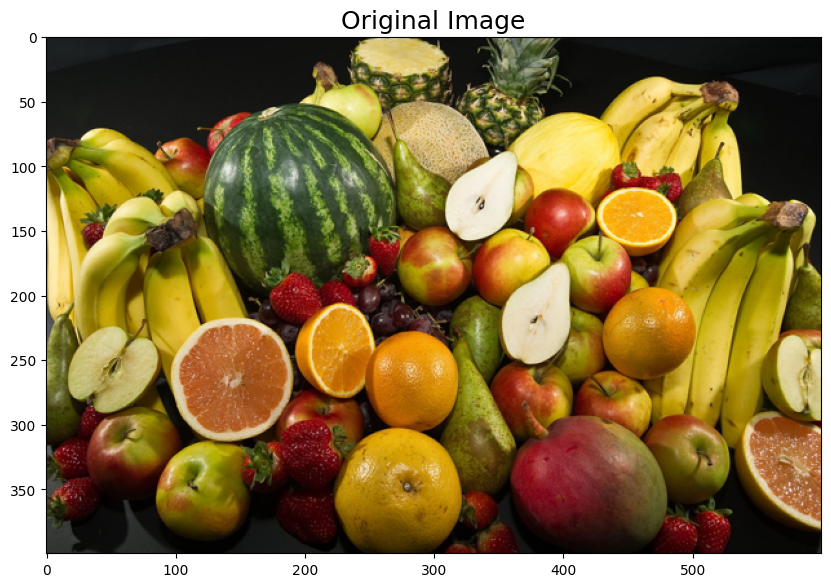

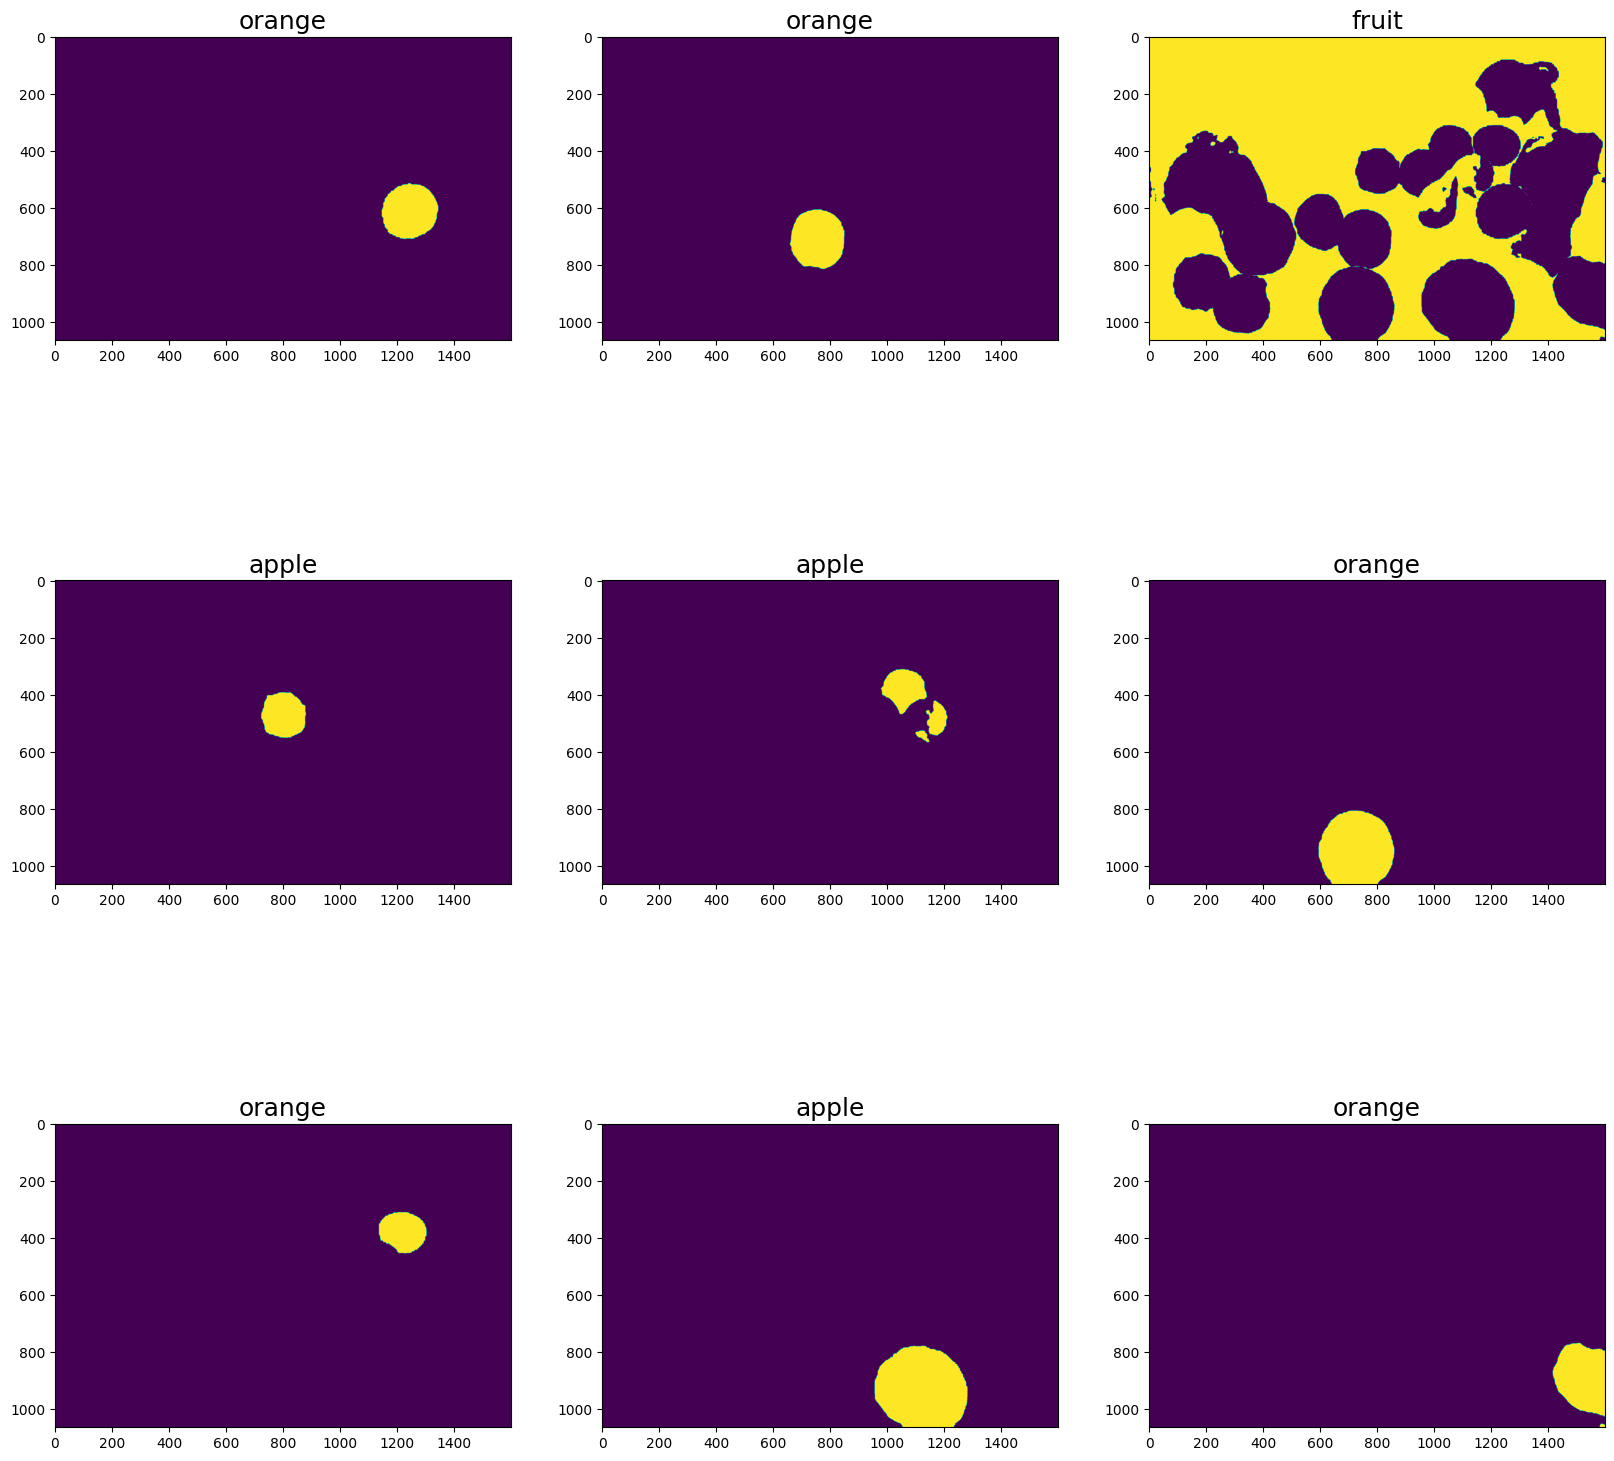

In [ ]:
def print_img_and_masks(model_output, original_img_path):

    img_masks_list = [i['mask'] for i in model_output][:9] #select top 9 results
    masks_labels = [i['label'] for i in model_output][:9] #select top 9 results

    original_img = Image.open(r"fruits.jpg")
    plt.figure(figsize = (10,10))
    plt.title('Original Image', fontsize=18)
    plt.imshow(original_img.resize((600, 400)));

    # print segmentation masks
    _, axs = plt.subplots(3, 3, figsize=(20, 20)) # 3x3 grid
    axs = axs.flatten()
    for img, ax, l in zip(img_masks_list, axs, masks_labels):
        ax.set_title(f'{l}', fontsize=18)
        ax.imshow(img)
    plt.show()

img_masks_out = model_img_segm("fruits.jpg", threshold=0.95, mask_threshold=0.7)
print_img_and_masks(img_masks_out, 'fruits.jpg')